In [14]:
library(dirichletprocess)
library(ggplot2)

In [7]:
Likelihood.poisson <- function(mdobj, x, theta){
return(as.numeric(dpois(x, theta[[1]])))
}

In [8]:
PriorDraw.poisson <- function(mdobj, n){
draws <- rgamma(n, mdobj$priorParameters[1], mdobj$priorParameters[2])
theta <- list(array(draws, dim=c(1,1,n)))
return(theta)
}

In [9]:
PosteriorDraw.poisson <- function(mdobj, x, n=1){
priorParameters <- mdobj$priorParameters
lambda <- rgamma(n, priorParameters[1] + sum(x), priorParameters[2] + nrow(x))
return(list(array(lambda, dim=c(1,1,n))))
}

In [10]:
Predictive.poisson <- function(mdobj, x){
priorParameters <- mdobj$priorParameters
pred <- numeric(length(x))
for(i in seq_along(x)){
alphaPost <- priorParameters[1] + x[i]
betaPost <- priorParameters[2] + 1
pred[i] <- (priorParameters[2] ^ priorParameters[1]) / gamma(priorParameters[1])
pred[i] <- pred[i] * gamma(alphaPost) / (betaPost^alphaPost)
pred[i] <- pred[i] * (1 / prod(factorial(x[i])))
}
return(pred)
}

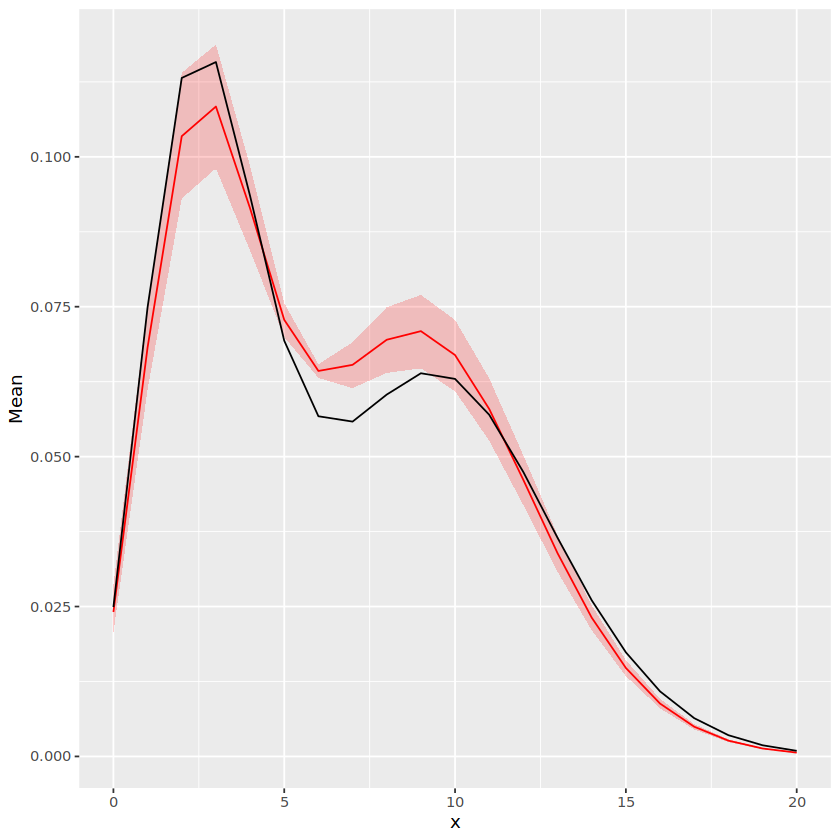

In [15]:

poisMd <- MixingDistribution(distribution="poisson",
 priorParameters = c(1, 1),
 conjugate="conjugate")
y <- c(rpois(150, 3), rpois(150, 10)) #generate sample data
dp <- DirichletProcessCreate(y, poisMd)
dp <- Initialise(dp)
dp <- Fit(dp, 1000)
pf <- PosteriorFrame(dp, 0:20, 1000)
trueFrame <- data.frame(x= 0:20,
 y= 0.5*dpois(0:20, 3) + 0.5*dpois(0:20, 10))


In [ ]:
ggplot() +
 geom_ribbon(data=pf,
 aes(x=x, ymin=X5., ymax=X95.),
 colour=NA,
 fill="red",
 alpha=0.2) + #credible intervals
 geom_line(data=pf, aes(x=x, y=Mean), colour="red") + #mean
 geom_line(data=trueFrame, aes(x=x, y=y)) #true

In [ ]:
DirichletProcess